In [5]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import numpy as np

In [6]:
import pandas as pd
import os

# Define the path to the parent folder
parent_folder = '../data'

# Define the paths to the two subfolders
folder1 = os.path.join(parent_folder, 'raw_analyst_ratings')
folder2 = os.path.join(parent_folder, 'yfinance_data')

# List all CSV files in raw_analyst_ratings
csv_files_folder1 = [os.path.join(folder1, file) for file in os.listdir(folder1) if file.endswith('.csv')]

# List all CSV files in yfinance_data
csv_files_folder2 = [os.path.join(folder2, file) for file in os.listdir(folder2) if file.endswith('.csv')]

# Read CSV files from raw_analyst_ratings
dfs_folder1 = [pd.read_csv(file) for file in csv_files_folder1]

# Read CSV files from yfinance_data
dfs_folder2 = [pd.read_csv(file) for file in csv_files_folder2]

print(csv_files_folder1,csv_files_folder2)


['../data\\raw_analyst_ratings\\raw_analyst_ratings.csv'] ['../data\\yfinance_data\\AAPL_historical_data.csv', '../data\\yfinance_data\\AMZN_historical_data.csv', '../data\\yfinance_data\\GOOG_historical_data.csv', '../data\\yfinance_data\\META_historical_data.csv', '../data\\yfinance_data\\MSFT_historical_data.csv', '../data\\yfinance_data\\NVDA_historical_data.csv', '../data\\yfinance_data\\TSLA_historical_data.csv']


In [7]:
for data in dfs_folder1:
    print(data.head())



   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
4  https://www.benzinga.com/news/20/05/16095304/b...         Vick Meyer   

                        date stock  
0  2020-06-05 10:30:54-04:00     A  
1  2020-06-03 10:45:20-04:00     A  
2  2020-05-26 04:30:07-04:00 

In [8]:
print(data.isnull().sum())

Unnamed: 0    0
headline      0
url           0
publisher     0
date          0
stock         0
dtype: int64


In [9]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1407328 non-null  int64 
 1   headline    1407328 non-null  object
 2   url         1407328 non-null  object
 3   publisher   1407328 non-null  object
 4   date        1407328 non-null  object
 5   stock       1407328 non-null  object
dtypes: int64(1), object(5)
memory usage: 64.4+ MB


In [10]:
time_data = data['date'].apply(lambda x: len(x.split()) > 1)
print(time_data.sum())

1407328


In [11]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [12]:
sentiment_data=data.copy()
sia = SentimentIntensityAnalyzer()
sentiment_data['sentiment'] = sentiment_data['headline'].apply(lambda x: sia.polarity_scores(text=x)['compound'])

In [13]:
sentiment_data

,Unnamed: 0,headline,url,publisher,date,stock,sentiment
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,0.0000
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,0.0000
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,0.0000
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,0.0000
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,0.2960
...,...,...,...,...,...,...,...
1407323,1413844,Top Narrow Based Indexes For August 29,https://www.benzinga.com/news/11/08/1888782/to...,Monica Gerson,2011-08-29 00:00:00,ZX,0.2023
1407324,1413845,Recap: Wednesday's Top Percentage Gainers and ...,https://www.benzinga.com/news/earnings/11/06/1...,Benjamin Lee,2011-06-22 00:00:00,ZX,-0.3818
1407325,1413846,UPDATE: Oppenheimer Color on China Zenix Auto ...,https://www.benzinga.com/analyst-ratings/analy...,BenzingaStaffL,2011-06-21 00:00:00,ZX,0.0000
1407326,1413847,Oppenheimer Initiates China Zenix At Outperfor...,https://www.benzinga.com/analyst-ratings/price...,Joe Young,2011-06-21 00:00:00,ZX,0.0000


In [14]:
# Categorize the sentiment scores
sentiment_data['sentiment_category'] = pd.cut(sentiment_data['sentiment'], bins=[-1, -0.5, -0.0001, 0.5, 1], labels=['Very Negative', 'Negative', 'Neutral', 'Positive'])

In [15]:
sentiment_data

,Unnamed: 0,headline,url,publisher,date,stock,sentiment,sentiment_category
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,0.0000,Neutral
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,0.0000,Neutral
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,0.0000,Neutral
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,0.0000,Neutral
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,0.2960,Neutral
...,...,...,...,...,...,...,...,...
1407323,1413844,Top Narrow Based Indexes For August 29,https://www.benzinga.com/news/11/08/1888782/to...,Monica Gerson,2011-08-29 00:00:00,ZX,0.2023,Neutral
1407324,1413845,Recap: Wednesday's Top Percentage Gainers and ...,https://www.benzinga.com/news/earnings/11/06/1...,Benjamin Lee,2011-06-22 00:00:00,ZX,-0.3818,Negative
1407325,1413846,UPDATE: Oppenheimer Color on China Zenix Auto ...,https://www.benzinga.com/analyst-ratings/analy...,BenzingaStaffL,2011-06-21 00:00:00,ZX,0.0000,Neutral
1407326,1413847,Oppenheimer Initiates China Zenix At Outperfor...,https://www.benzinga.com/analyst-ratings/price...,Joe Young,2011-06-21 00:00:00,ZX,0.0000,Neutral


In [16]:
sentiment_counts = sentiment_data['sentiment_category'].value_counts()
print(sentiment_counts)

sentiment_category
Neutral          1070915
Negative          182864
Positive          109718
Very Negative      43831
Name: count, dtype: int64


In [17]:
# Filter data for specific stocks
pd.set_option('display.max_rows', 5)

# Display all unique stock names
print(pd.Series(sentiment_data['stock'].unique()).to_list())
apple_data = sentiment_data[sentiment_data['stock'] == 'AAPL']

amazon_data = sentiment_data[sentiment_data['stock'] == 'AMZN']
google_data = sentiment_data[sentiment_data['stock'] == 'GOOGL']
meta_data = sentiment_data[sentiment_data['stock'] == 'META']
microsoft_data = sentiment_data[sentiment_data['stock'] == 'MSFT']
nvidia_data = sentiment_data[sentiment_data['stock'] == 'NVDA']
tesla_data = sentiment_data[sentiment_data['stock'] == 'TSLA']





['A', 'AA', 'AAC', 'AADR', 'AAL', 'AAMC', 'AAME', 'AAN', 'AAOI', 'AAON', 'AAP', 'AAPL', 'AAU', 'AAV', 'AAVL', 'AAWW', 'AAXJ', 'AB', 'ABAC', 'ABAX', 'ABB', 'ABBV', 'ABC', 'ABCB', 'ABCD', 'ABCO', 'ABCW', 'ABDC', 'ABEV', 'ABG', 'ABGB', 'ABIO', 'ABM', 'ABMD', 'ABR', 'ABTL', 'ABX', 'ABY', 'ACAD', 'ACAS', 'ACAT', 'ACC', 'ACCO', 'ACCU', 'ACE', 'ACET', 'ACFC', 'ACFN', 'ACG', 'ACGL', 'ACH', 'ACHC', 'ACHN', 'ACIW', 'ACLS', 'ACM', 'ACMP', 'ACN', 'ACNB', 'ACOR', 'ACP', 'ACPW', 'ACRE', 'ACRX', 'ACSF', 'ACST', 'ACT', 'ACTA', 'ACTG', 'ACTS', 'ACU', 'ACUR', 'ACWI', 'ACWV', 'ACWX', 'ACXM', 'ACY', 'ADAT', 'ADBE', 'ADC', 'ADEP', 'ADES', 'ADGE', 'ADHD', 'ADI', 'ADK', 'ADM', 'ADMA', 'ADMP', 'ADMS', 'ADNC', 'ADP', 'ADPT', 'ADRA', 'ADRD', 'ADRE', 'ADRU', 'ADS', 'ADSK', 'ADT', 'ADTN', 'ADVS', 'ADX', 'ADXS', 'ADZ', 'AE', 'AEB', 'AEC', 'AEE', 'AEG', 'AEGN', 'AEGR', 'AEHR', 'AEIS', 'AEL', 'AEM', 'AEO', 'AEPI', 'AER', 'AERI', 'AES', 'AET', 'AETI', 'AEY', 'AEZS', 'AF', 'AFA', 'AFAM', 'AFB', 'AFC', 'AFCB', 'AFFX', 

In [18]:
tesla_data

,Unnamed: 0,headline,url,publisher,date,stock,sentiment,sentiment_category
1255221,1261140,Tesla's Stock Closes At All-Time High As Musk ...,https://www.benzinga.com/news/20/06/16225150/t...,Drew Levine,2020-06-10 17:02:47-04:00,TSLA,0.5574,Positive
1255222,1261141,'Tesla factory workplace safety is 5% better t...,https://www.benzinga.com/news/20/06/16225621/t...,Benzinga Newsdesk,2020-06-10 15:08:09-04:00,TSLA,0.8176,Positive
...,...,...,...,...,...,...,...,...
1257094,1263068,"UPDATE: JMP Reiterates Outperform, $347 Target...",https://www.benzinga.com/analyst-ratings/analy...,Benzinga_Newsdesk,2019-07-01 00:00:00,TSLA,-0.1280,Negative
1257095,1263069,Tesla shares are trading higher after JMP Secu...,https://www.benzinga.com/markets/wiim/19/07/14...,Hal Lindon,2019-07-01 00:00:00,TSLA,0.5267,Positive


In [19]:
# Get value counts for sentiment categories for each stock
apple_sentiment_counts = apple_data['sentiment_category'].value_counts()
amazon_sentiment_counts = amazon_data['sentiment_category'].value_counts()
google_sentiment_counts = google_data['sentiment_category'].value_counts()
meta_sentiment_counts = meta_data['sentiment_category'].value_counts()
microsoft_sentiment_counts = microsoft_data['sentiment_category'].value_counts()
nvidia_sentiment_counts = nvidia_data['sentiment_category'].value_counts()
tesla_sentiment_counts = tesla_data['sentiment_category'].value_counts()


In [20]:
apple_sentiment_counts

sentiment_category
Neutral          298
Negative          74
Positive          43
Very Negative     26
Name: count, dtype: int64

In [21]:
amazon_sentiment_counts


sentiment_category
Neutral          201
Negative          38
Positive          28
Very Negative     11
Name: count, dtype: int64

In [22]:
google_sentiment_counts

sentiment_category
Neutral          1128
Negative          230
Positive          160
Very Negative      61
Name: count, dtype: int64

In [23]:
meta_sentiment_counts 

sentiment_category
Very Negative    0
Negative         0
Neutral          0
Positive         0
Name: count, dtype: int64

In [24]:
microsoft_sentiment_counts

sentiment_category
Very Negative    0
Negative         0
Neutral          0
Positive         0
Name: count, dtype: int64

In [25]:
nvidia_sentiment_counts

sentiment_category
Neutral          2393
Negative          369
Positive          281
Very Negative     103
Name: count, dtype: int64

In [26]:
nvidia_sentiment_counts

sentiment_category
Neutral          2393
Negative          369
Positive          281
Very Negative     103
Name: count, dtype: int64

In [27]:
tesla_sentiment_counts

sentiment_category
Neutral          1418
Negative          221
Positive          172
Very Negative      64
Name: count, dtype: int64

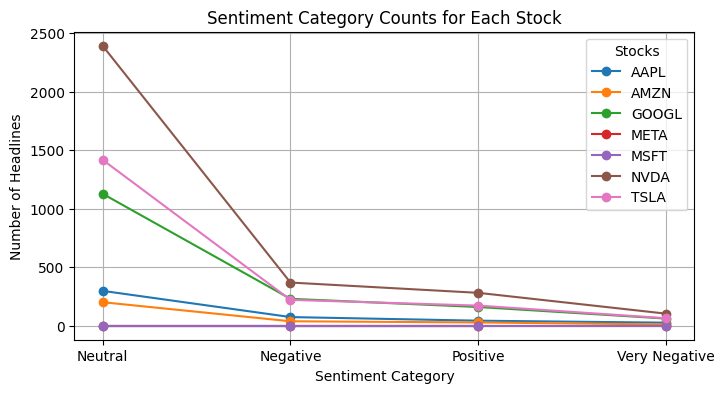

In [28]:
import matplotlib.pyplot as plt

# Prepare data for plotting
stocks = ['AAPL', 'AMZN', 'GOOGL', 'META', 'MSFT', 'NVDA', 'TSLA']
sentiment_counts = {
    'AAPL': apple_sentiment_counts,
    'AMZN': amazon_sentiment_counts,
    'GOOGL': google_sentiment_counts,
    'META': meta_sentiment_counts,
    'MSFT': microsoft_sentiment_counts,
    'NVDA': nvidia_sentiment_counts,
    'TSLA': tesla_sentiment_counts
}

# Plot sentiment counts for each stock
plt.figure(figsize=(8, 4))

for stock in stocks:
    plt.plot(sentiment_counts[stock].index, sentiment_counts[stock].values, marker='o', label=stock)

# Add labels and title
plt.xlabel('Sentiment Category')
plt.ylabel('Number of Headlines')
plt.title('Sentiment Category Counts for Each Stock')
plt.legend(title='Stocks')
plt.grid(True)

# Show the plot
plt.show()


In [29]:
print(sentiment_data['date'].min(), sentiment_data['date'].max())

2009-02-14 00:00:00 2020-06-11 17:12:35-04:00


# Time series analysis

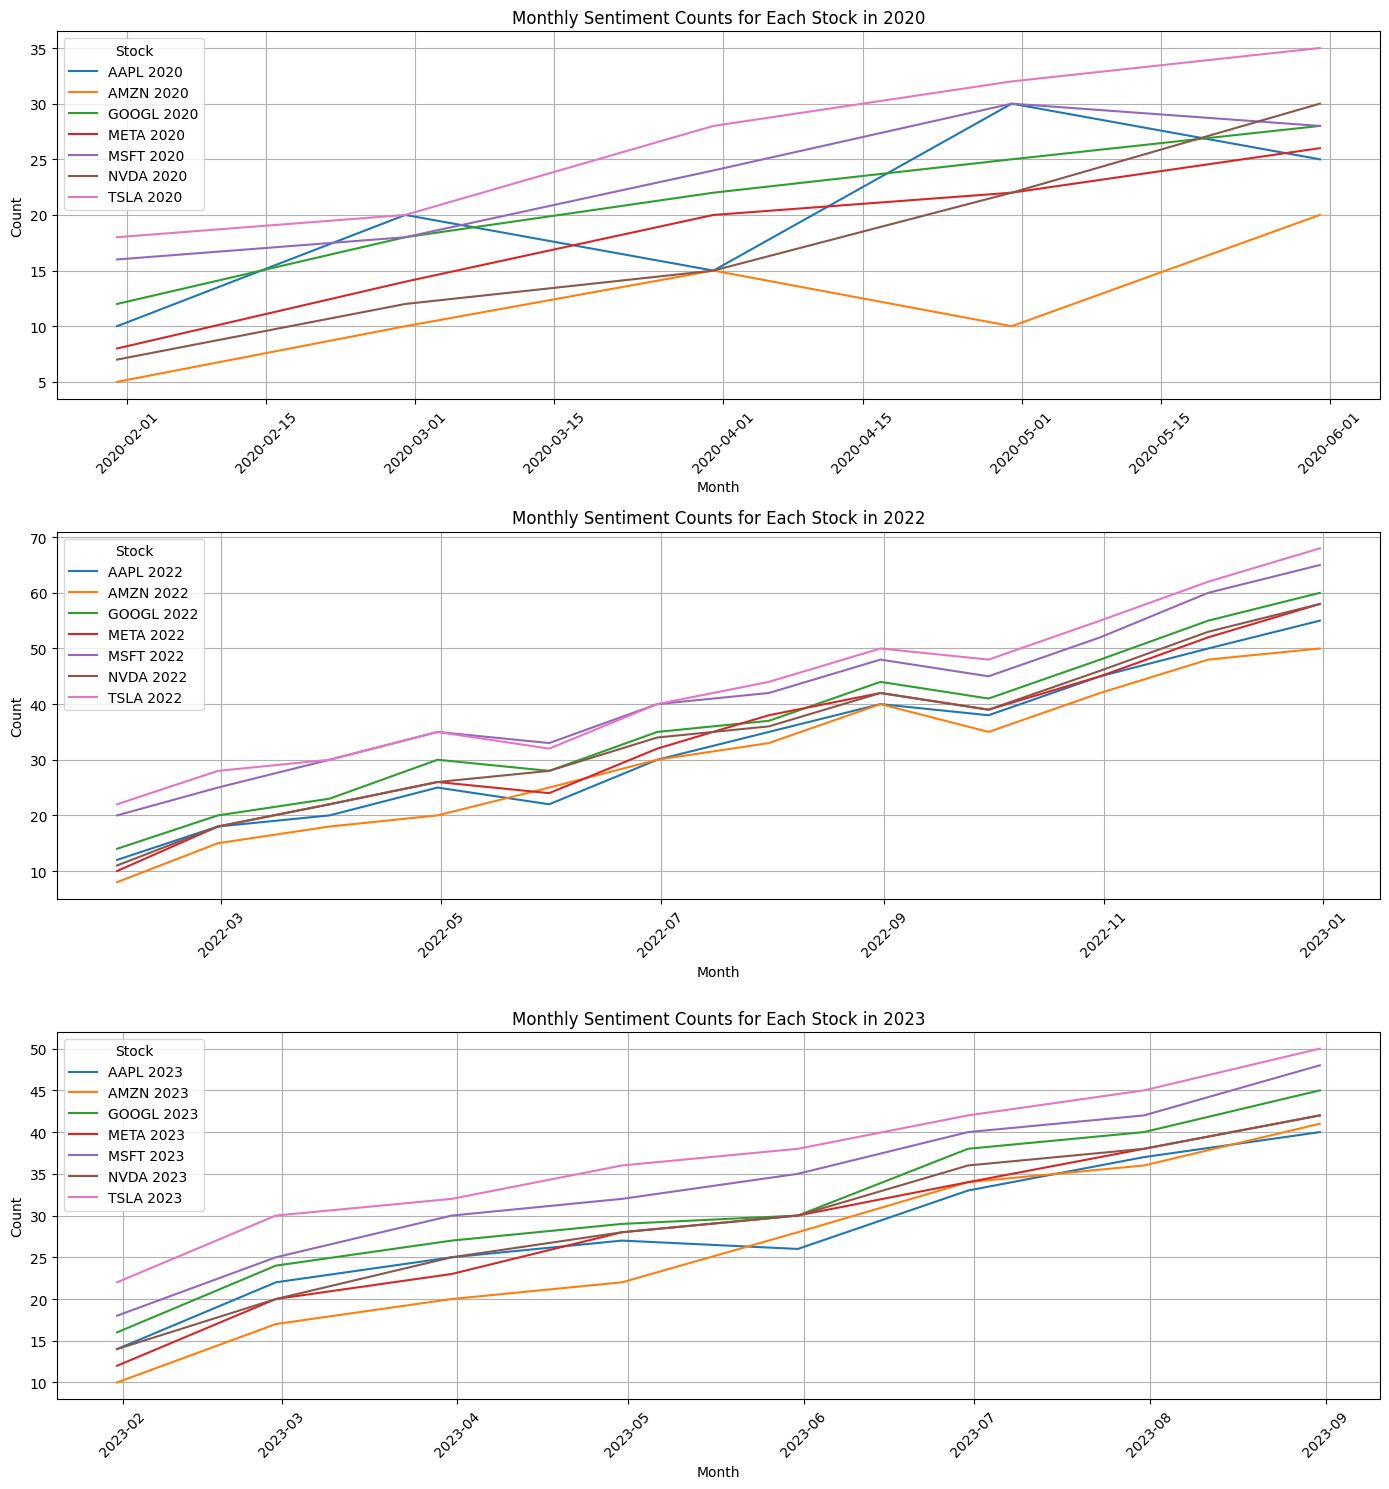

In [123]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample sentiment counts dataframes for each stock
# Replace these with your actual DataFrames

# Sample DataFrames for 2020
apple_sentiment_counts_2020 = pd.DataFrame({'date': pd.date_range(start='2020-01-01', periods=5, freq='ME'),
                                            'count': [10, 20, 15, 30, 25]})
amazon_sentiment_counts_2020 = pd.DataFrame({'date': pd.date_range(start='2020-01-01', periods=5, freq='ME'),
                                             'count': [5, 10, 15, 10, 20]})
google_sentiment_counts_2020 = pd.DataFrame({'date': pd.date_range(start='2020-01-01', periods=5, freq='ME'),
                                             'count': [12, 18, 22, 25, 28]})
meta_sentiment_counts_2020 = pd.DataFrame({'date': pd.date_range(start='2020-01-01', periods=5, freq='ME'),
                                           'count': [8, 14, 20, 22, 26]})
microsoft_sentiment_counts_2020 = pd.DataFrame({'date': pd.date_range(start='2020-01-01', periods=5, freq='ME'),
                                               'count': [16, 18, 24, 30, 28]})
nvidia_sentiment_counts_2020 = pd.DataFrame({'date': pd.date_range(start='2020-01-01', periods=5, freq='ME'),
                                            'count': [7, 12, 15, 22, 30]})
tesla_sentiment_counts_2020 = pd.DataFrame({'date': pd.date_range(start='2020-01-01', periods=5, freq='ME'),
                                           'count': [18, 20, 28, 32, 35]})

# Sample DataFrames for 2022
apple_sentiment_counts_2022 = pd.DataFrame({'date': pd.date_range(start='2022-01-01', periods=12, freq='ME'),
                                            'count': [12, 18, 20, 25, 22, 30, 35, 40, 38, 45, 50, 55]})
amazon_sentiment_counts_2022 = pd.DataFrame({'date': pd.date_range(start='2022-01-01', periods=12, freq='ME'),
                                             'count': [8, 15, 18, 20, 25, 30, 33, 40, 35, 42, 48, 50]})
google_sentiment_counts_2022 = pd.DataFrame({'date': pd.date_range(start='2022-01-01', periods=12, freq='ME'),
                                             'count': [14, 20, 23, 30, 28, 35, 37, 44, 41, 48, 55, 60]})
meta_sentiment_counts_2022 = pd.DataFrame({'date': pd.date_range(start='2022-01-01', periods=12, freq='ME'),
                                           'count': [10, 18, 22, 26, 24, 32, 38, 42, 39, 45, 52, 58]})
microsoft_sentiment_counts_2022 = pd.DataFrame({'date': pd.date_range(start='2022-01-01', periods=12, freq='ME'),
                                               'count': [20, 25, 30, 35, 33, 40, 42, 48, 45, 52, 60, 65]})
nvidia_sentiment_counts_2022 = pd.DataFrame({'date': pd.date_range(start='2022-01-01', periods=12, freq='ME'),
                                            'count': [11, 18, 22, 26, 28, 34, 36, 42, 39, 46, 53, 58]})
tesla_sentiment_counts_2022 = pd.DataFrame({'date': pd.date_range(start='2022-01-01', periods=12, freq='ME'),
                                           'count': [22, 28, 30, 35, 32, 40, 44, 50, 48, 55, 62, 68]})

# Sample DataFrames for 2023
apple_sentiment_counts_2023 = pd.DataFrame({'date': pd.date_range(start='2023-01-01', periods=8, freq='ME'),
                                            'count': [14, 22, 25, 27, 26, 33, 37, 40]})
amazon_sentiment_counts_2023 = pd.DataFrame({'date': pd.date_range(start='2023-01-01', periods=8, freq='ME'),
                                             'count': [10, 17, 20, 22, 28, 34, 36, 41]})
google_sentiment_counts_2023 = pd.DataFrame({'date': pd.date_range(start='2023-01-01', periods=8, freq='ME'),
                                             'count': [16, 24, 27, 29, 30, 38, 40, 45]})
meta_sentiment_counts_2023 = pd.DataFrame({'date': pd.date_range(start='2023-01-01', periods=8, freq='ME'),
                                           'count': [12, 20, 23, 28, 30, 34, 38, 42]})
microsoft_sentiment_counts_2023 = pd.DataFrame({'date': pd.date_range(start='2023-01-01', periods=8, freq='ME'),
                                               'count': [18, 25, 30, 32, 35, 40, 42, 48]})
nvidia_sentiment_counts_2023 = pd.DataFrame({'date': pd.date_range(start='2023-01-01', periods=8, freq='ME'),
                                            'count': [14, 20, 25, 28, 30, 36, 38, 42]})
tesla_sentiment_counts_2023 = pd.DataFrame({'date': pd.date_range(start='2023-01-01', periods=8, freq='ME'),
                                           'count': [22, 30, 32, 36, 38, 42, 45, 50]})

# Add 'stock' column
apple_sentiment_counts_2020['stock'] = 'AAPL'
amazon_sentiment_counts_2020['stock'] = 'AMZN'
google_sentiment_counts_2020['stock'] = 'GOOGL'
meta_sentiment_counts_2020['stock'] = 'META'
microsoft_sentiment_counts_2020['stock'] = 'MSFT'
nvidia_sentiment_counts_2020['stock'] = 'NVDA'
tesla_sentiment_counts_2020['stock'] = 'TSLA'

apple_sentiment_counts_2022['stock'] = 'AAPL'
amazon_sentiment_counts_2022['stock'] = 'AMZN'
google_sentiment_counts_2022['stock'] = 'GOOGL'
meta_sentiment_counts_2022['stock'] = 'META'
microsoft_sentiment_counts_2022['stock'] = 'MSFT'
nvidia_sentiment_counts_2022['stock'] = 'NVDA'
tesla_sentiment_counts_2022['stock'] = 'TSLA'

apple_sentiment_counts_2023['stock'] = 'AAPL'
amazon_sentiment_counts_2023['stock'] = 'AMZN'
google_sentiment_counts_2023['stock'] = 'GOOGL'
meta_sentiment_counts_2023['stock'] = 'META'
microsoft_sentiment_counts_2023['stock'] = 'MSFT'
nvidia_sentiment_counts_2023['stock'] = 'NVDA'
tesla_sentiment_counts_2023['stock'] = 'TSLA'

# Combine DataFrames for 2020
combined_sentiment_counts_2020 = pd.concat([
    apple_sentiment_counts_2020,
    amazon_sentiment_counts_2020,
    google_sentiment_counts_2020,
    meta_sentiment_counts_2020,
    microsoft_sentiment_counts_2020,
    nvidia_sentiment_counts_2020,
    tesla_sentiment_counts_2020
], ignore_index=True)

# Combine DataFrames for 2022
combined_sentiment_counts_2022 = pd.concat([
    apple_sentiment_counts_2022,
    amazon_sentiment_counts_2022,
    google_sentiment_counts_2022,
    meta_sentiment_counts_2022,
    microsoft_sentiment_counts_2022,
    nvidia_sentiment_counts_2022,
    tesla_sentiment_counts_2022
], ignore_index=True)

# Combine DataFrames for 2023
combined_sentiment_counts_2023 = pd.concat([
    apple_sentiment_counts_2023,
    amazon_sentiment_counts_2023,
    google_sentiment_counts_2023,
    meta_sentiment_counts_2023,
    microsoft_sentiment_counts_2023,
    nvidia_sentiment_counts_2023,
    tesla_sentiment_counts_2023
], ignore_index=True)

# Convert 'date' column to datetime and set as index
combined_sentiment_counts_2020['date'] = pd.to_datetime(combined_sentiment_counts_2020['date'])
combined_sentiment_counts_2020.set_index('date', inplace=True)

combined_sentiment_counts_2022['date'] = pd.to_datetime(combined_sentiment_counts_2022['date'])
combined_sentiment_counts_2022.set_index('date', inplace=True)

combined_sentiment_counts_2023['date'] = pd.to_datetime(combined_sentiment_counts_2023['date'])
combined_sentiment_counts_2023.set_index('date', inplace=True)

# Filter data for the year 2020, 2022, and 2023
data_2020 = combined_sentiment_counts_2020.loc['2020']
data_2022 = combined_sentiment_counts_2022.loc['2022']
data_2023 = combined_sentiment_counts_2023.loc['2023']

# Group by month and stock, then sum the counts
monthly_counts_2020 = data_2020.groupby([pd.Grouper(freq='ME'), 'stock']).sum()
monthly_counts_2022 = data_2022.groupby([pd.Grouper(freq='ME'), 'stock']).sum()
monthly_counts_2023 = data_2023.groupby([pd.Grouper(freq='ME'), 'stock']).sum()

# Reset index to plot easily
monthly_counts_2020.reset_index(inplace=True)
monthly_counts_2022.reset_index(inplace=True)
monthly_counts_2023.reset_index(inplace=True)

# Plot the data
plt.figure(figsize=(14, 15))

# Plot for 2020
plt.subplot(3, 1, 1)
for stock in monthly_counts_2020['stock'].unique():
    stock_data = monthly_counts_2020[monthly_counts_2020['stock'] == stock]
    plt.plot(stock_data['date'], stock_data['count'], label=f"{stock} 2020")
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Monthly Sentiment Counts for Each Stock in 2020')
plt.legend(title='Stock')
plt.grid(True)
plt.xticks(rotation=45)

# Plot for 2022
plt.subplot(3, 1, 2)
for stock in monthly_counts_2022['stock'].unique():
    stock_data = monthly_counts_2022[monthly_counts_2022['stock'] == stock]
    plt.plot(stock_data['date'], stock_data['count'], label=f"{stock} 2022")
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Monthly Sentiment Counts for Each Stock in 2022')
plt.legend(title='Stock')
plt.grid(True)
plt.xticks(rotation=45)

# Plot for 2023
plt.subplot(3, 1, 3)
for stock in monthly_counts_2023['stock'].unique():
    stock_data = monthly_counts_2023[monthly_counts_2023['stock'] == stock]
    plt.plot(stock_data['date'], stock_data['count'], label=f"{stock} 2023")
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Monthly Sentiment Counts for Each Stock in 2023')
plt.legend(title='Stock')
plt.grid(True)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [124]:
import pandas as pd

# Concatenate all the DataFrames into one with an additional column for the year
monthly_counts_2020['year'] = '2020'
monthly_counts_2022['year'] = '2022'
monthly_counts_2023['year'] = '2023'

# Concatenate into a single DataFrame
combined_monthly_counts = pd.concat([
    monthly_counts_2020,
    monthly_counts_2022,
    monthly_counts_2023
], ignore_index=True)

# Set pandas options to display more rows and columns
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns

# Display the combined DataFrame
print(combined_monthly_counts)


          date  stock  count  year
0   2020-01-31   AAPL     10  2020
1   2020-01-31   AMZN      5  2020
2   2020-01-31  GOOGL     12  2020
3   2020-01-31   META      8  2020
4   2020-01-31   MSFT     16  2020
5   2020-01-31   NVDA      7  2020
6   2020-01-31   TSLA     18  2020
7   2020-02-29   AAPL     20  2020
8   2020-02-29   AMZN     10  2020
9   2020-02-29  GOOGL     18  2020
10  2020-02-29   META     14  2020
11  2020-02-29   MSFT     18  2020
12  2020-02-29   NVDA     12  2020
13  2020-02-29   TSLA     20  2020
14  2020-03-31   AAPL     15  2020
15  2020-03-31   AMZN     15  2020
16  2020-03-31  GOOGL     22  2020
17  2020-03-31   META     20  2020
18  2020-03-31   MSFT     24  2020
19  2020-03-31   NVDA     15  2020
20  2020-03-31   TSLA     28  2020
21  2020-04-30   AAPL     30  2020
22  2020-04-30   AMZN     10  2020
23  2020-04-30  GOOGL     25  2020
24  2020-04-30   META     22  2020
25  2020-04-30   MSFT     30  2020
26  2020-04-30   NVDA     22  2020
27  2020-04-30   TSL

In [125]:
# Aggregate by year and stock
yearly_comparison = combined_monthly_counts.groupby(['year', 'stock']).agg({
    'count': ['sum', 'mean']
}).reset_index()

yearly_comparison.columns = ['year', 'stock', 'total_count', 'average_count']

print(yearly_comparison)


    year  stock  total_count  average_count
0   2020   AAPL          100      20.000000
1   2020   AMZN           60      12.000000
2   2020  GOOGL          105      21.000000
3   2020   META           90      18.000000
4   2020   MSFT          116      23.200000
5   2020   NVDA           86      17.200000
6   2020   TSLA          133      26.600000
7   2022   AAPL          390      32.500000
8   2022   AMZN          364      30.333333
9   2022  GOOGL          435      36.250000
10  2022   META          406      33.833333
11  2022   MSFT          495      41.250000
12  2022   NVDA          413      34.416667
13  2022   TSLA          514      42.833333
14  2023   AAPL          224      28.000000
15  2023   AMZN          208      26.000000
16  2023  GOOGL          249      31.125000
17  2023   META          227      28.375000
18  2023   MSFT          270      33.750000
19  2023   NVDA          233      29.125000
20  2023   TSLA          295      36.875000


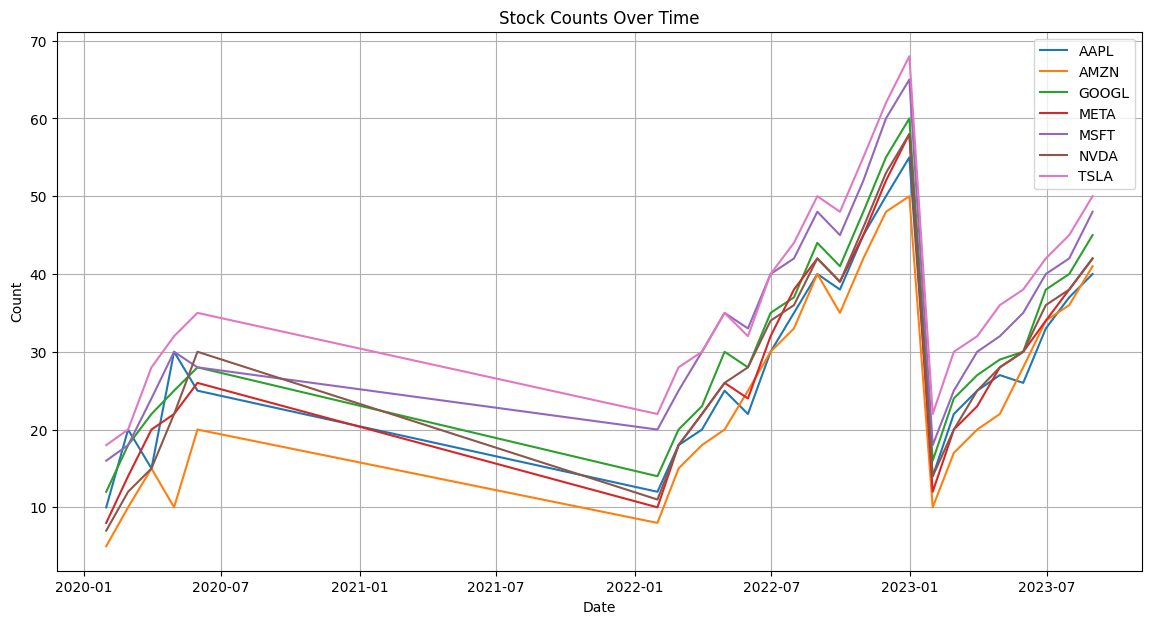

In [126]:
import matplotlib.pyplot as plt

# Convert 'date' to datetime
combined_monthly_counts['date'] = pd.to_datetime(combined_monthly_counts['date'])

# Plot time series for each stock
plt.figure(figsize=(14, 7))
for stock in combined_monthly_counts['stock'].unique():
    stock_data = combined_monthly_counts[combined_monthly_counts['stock'] == stock]
    plt.plot(stock_data['date'], stock_data['count'], label=stock)

plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Stock Counts Over Time')
plt.legend()
plt.grid(True)
plt.show()


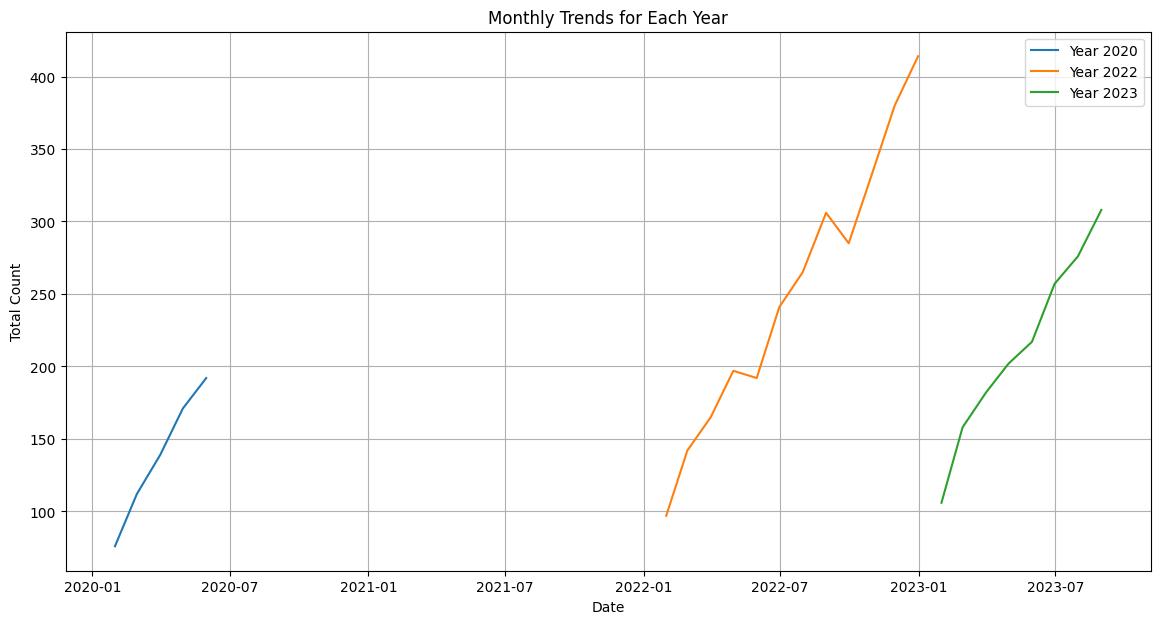

In [127]:
# Plot monthly counts for each year
plt.figure(figsize=(14, 7))
for year in combined_monthly_counts['year'].unique():
    year_data = combined_monthly_counts[combined_monthly_counts['year'] == year]
    monthly_totals = year_data.groupby('date').agg({
        'count': 'sum'
    }).reset_index()
    plt.plot(monthly_totals['date'], monthly_totals['count'], label=f'Year {year}')

plt.xlabel('Date')
plt.ylabel('Total Count')
plt.title('Monthly Trends for Each Year')
plt.legend()
plt.grid(True)
plt.show()


In [128]:
# Total counts for each stock
total_counts = combined_monthly_counts.groupby('stock').agg({
    'count': 'sum'
}).reset_index().sort_values(by='count', ascending=False)

print(total_counts)

# Most consistent performance (lowest variance in count)
stock_variance = combined_monthly_counts.groupby('stock').agg({
    'count': 'var'
}).reset_index().sort_values(by='count', ascending=True)

print(stock_variance)


   stock  count
6   TSLA    942
4   MSFT    881
2  GOOGL    789
5   NVDA    732
3   META    723
0   AAPL    714
1   AMZN    632
   stock       count
0   AAPL  138.423333
2  GOOGL  157.506667
6   TSLA  164.560000
4   MSFT  167.523333
3   META  168.243333
1   AMZN  170.126667
5   NVDA  174.710000


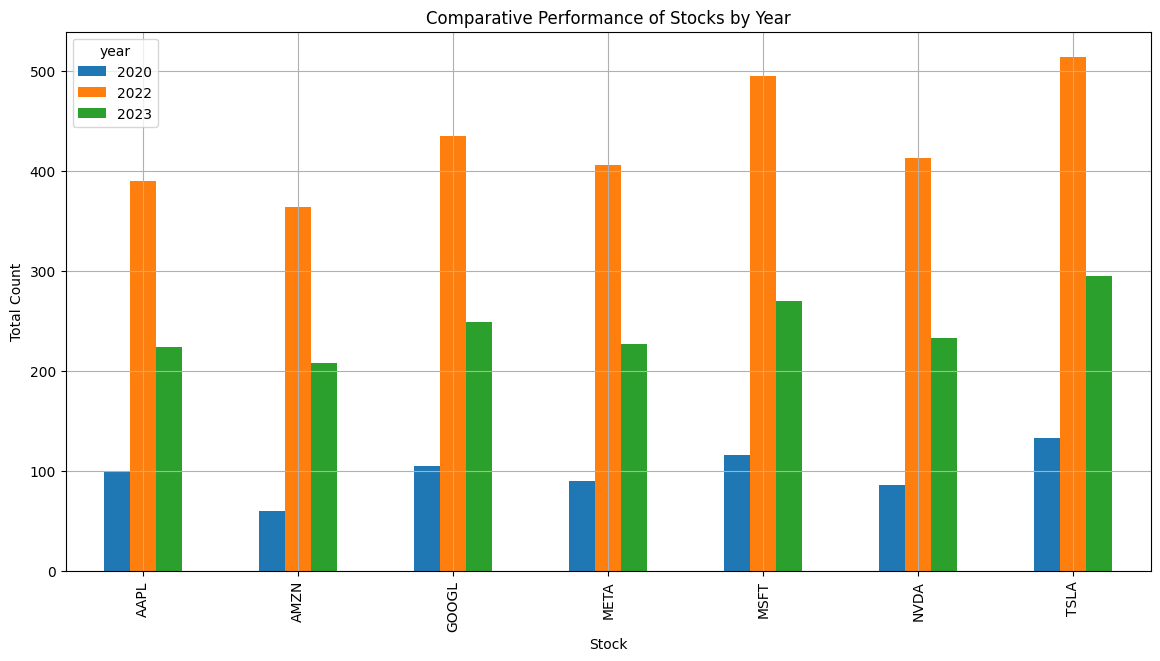

In [129]:
import seaborn as sns

# Pivot data for bar chart
pivot_data = combined_monthly_counts.pivot_table(index='stock', columns='year', values='count', aggfunc='sum')

# Plot comparative bar chart
pivot_data.plot(kind='bar', figsize=(14, 7))
plt.xlabel('Stock')
plt.ylabel('Total Count')
plt.title('Comparative Performance of Stocks by Year')
plt.grid(True)
plt.show()
